# Predicción del abandono (burnout) de empleados

- Eduardo Rodríguez Sánchez   -   100451243
- Inés Romero González    -   100451155

## Índice

1. [Introducción](#Introducción)
2. [EDA](#EDA)

## Introducción

La predicción del abandono de empleados es un problema común en el campo de la gestión de recursos humanos. En estos problemas, se predice qué empleados tienen más probabilidad de abandonar la empresa en un futuro cercano. Las predicciones obtenidas son importantes para que las empresas puedan tomar medidas y mantengan a sus mejores empleados. En este notebook, se aborda la tarea de predecir qué empleados tienen una mayor probabilidad de dejar la empresa. Para ello, se aplicarán técnicas de aprendizaje automático.

El objetivo final es construir un modelo preciso que pueda utilizarse para realizar predicciones futuras y ayudar a la empresa a tomar medidas para mantener a sus empleados de mayor valor.

## EDA
### Carga de datos

In [1]:
import pickle
import pandas as pd

# Load the model
with open('attrition_available_4.pkl', 'rb') as f:
    data = pickle.load(f)

### Exploración incial de los datos

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      3671 non-null   float64
 1   absences                 3681 non-null   float64
 2   JobInvolvement           3594 non-null   float64
 3   PerformanceRating        3676 non-null   float64
 4   EnvironmentSatisfaction  3444 non-null   float64
 5   JobSatisfaction          4390 non-null   float64
 6   WorkLifeBalance          3488 non-null   float64
 7   Age                      3689 non-null   float64
 8   Attrition                4410 non-null   object 
 9   BusinessTravel           3644 non-null   object 
 10  Department               3575 non-null   object 
 11  DistanceFromHome         3476 non-null   float64
 12  Education                3467 non-null   float64
 13  EducationField           3596 non-null   object 
 14  EmployeeCount           

Como podemos observar del resumen anterior, nuestro dataset está compuesto de 30 columnas y 4410 filas. De estas 31 columnas, la número 8 *Attrition* es la que queremos predecir, ya que es la que nos indica si el empleado ha abandonado la empresa o no. El resto de columnas son las características de los empleados que utilizaremos para predecir si abandonarán o no la empresa.

Contamos con diversos tipos de datos, como son: enteros, flotantes, booleanos y cadenas de caracteres. Esto supone un problema, ya que la mayoría de algoritmos de aprendizaje automático no son capaces de trabajar con variables categóricas como las cadenas de caracteres. Por ello, debemos hacer el correspondiente tratamiento de los datos previo a la aplicación de los algoritmos.

A continuación realizaremos un estudio más en profundidad para conocer mejor los atributos con los que estaremos trabajando a lo largo del proyecto.

In [27]:
# Separate 10 first columns from the rest
data1 = data.iloc[:, 0:10]
data2 = data.iloc[:, 10:20]
data3 = data.iloc[:, 20:]


In [24]:
data1.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel
1,NaN,13.0,2.0,4.0,3.0,2.0,NaN,31.0,Yes,Travel_Frequently
6,6.450877,17.0,3.0,4.0,NaN,3.0,NaN,28.0,Yes,Travel_Rarely
13,8.871421,14.0,2.0,NaN,1.0,2.0,2.0,47.0,Yes,Non-Travel
28,10.713066,6.0,NaN,3.0,4.0,3.0,1.0,44.0,Yes,Travel_Frequently
30,9.662808,11.0,NaN,3.0,1.0,2.0,3.0,26.0,Yes,Travel_Rarely


In [25]:
data2.head()

,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus
1,Research & Development,10.0,NaN,Life Sciences,1,NaN,Female,1.0,Research Scientist,Single
6,Research & Development,11.0,2.0,Medical,1,7.0,Male,2.0,Sales Executive,NaN
13,Research & Development,NaN,NaN,NaN,1,14.0,Male,1.0,Research Scientist,Married
28,NaN,1.0,NaN,Medical,1,NaN,Male,2.0,Research Scientist,Divorced
30,Research & Development,NaN,3.0,Medical,1,NaN,Male,3.0,Research Scientist,NaN


In [28]:
data3.head()

,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,41890.0,0.0,Y,23,8.0,1.0,6.0,NaN,5.0,1.0,4.0
6,58130.0,2.0,Y,20,8.0,1.0,5.0,NaN,0.0,0.0,0.0
13,57620.0,1.0,Y,11,NaN,2.0,10.0,4.0,10.0,9.0,9.0
28,103330.0,3.0,Y,14,8.0,NaN,19.0,2.0,1.0,0.0,NaN
30,68540.0,2.0,Y,11,NaN,0.0,5.0,NaN,3.0,0.0,2.0


In [16]:
data.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,3671.000000,3681.000000,3594.000000,3676.000000,3444.000000,4390.000000,3488.000000,3689.000000,3476.000000,3467.000000,...,3671.000000,3600.000000,4410.000000,3596.0,3572.000000,4401.000000,3674.000000,3625.000000,3569.000000,3529.000000
mean,7.304060,12.744906,2.732332,3.157236,2.722706,2.728246,2.753440,36.966929,9.293153,2.914335,...,65846.248978,2.692222,15.209524,8.0,0.796473,11.279936,2.788786,7.003862,2.210703,4.090677
std,1.325198,5.506406,0.709073,0.364073,1.096583,1.101253,0.710033,9.175234,8.150955,1.017952,...,47568.463352,2.488037,3.659108,0.0,0.854762,7.782222,1.281303,6.177425,3.255280,3.572499
min,5.424757,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.266983,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,29330.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,7.002454,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,...,49680.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.891257,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,85920.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [9]:
# Count the number of missing values in each column
data.isnull().sum()

hrs                        739
absences                   729
JobInvolvement             816
PerformanceRating          734
EnvironmentSatisfaction    966
JobSatisfaction             20
WorkLifeBalance            922
Age                        721
Attrition                    0
BusinessTravel             766
Department                 835
DistanceFromHome           934
Education                  943
EducationField             814
EmployeeCount                0
EmployeeID                 764
Gender                     785
JobLevel                   814
JobRole                    865
MaritalStatus              742
MonthlyIncome              739
NumCompaniesWorked         810
Over18                     857
PercentSalaryHike            0
StandardHours              814
StockOptionLevel           838
TotalWorkingYears            9
TrainingTimesLastYear      736
YearsAtCompany             785
YearsSinceLastPromotion    841
YearsWithCurrManager       881
dtype: int64

Como podemos observar de la información mostrada anterioremente, todas las variables tienen valores nulos, excepto la variable de respuesta *Attrition* y las variables *EmployeeCount* y *PercentSalaryHike*. Por ello, más adelante, se realizará un tratamiento de los datos para gestionar estos valores nulos.

Podemos clasificar las variables de la siguiente manera:
- Números reales: *hrs*, 
- Cadenas de caracteres: *Attrition*, *BussinessTravel*, *Department*, *EducationField*, *Gender*, *JobRole*, *MaritalStatus*, *Over18*, 
- Ordinales: *JobInvolvement*, *PerformanceRating*, *EnviromentSatifaction*, *JobSatisfaction*, *WorkLifeBalance*, *Education*, *JobLevel*, *StockOptionLevel*,
- Números enteros: *Absences*, *Age*, *DistanceFromHome*, *EmployeeCount*, *EmployeeID*, *MonthlyIncome*, *NumCompaniesWorked*, *PercentSalaryHike*, *StandardHours*, *TotalWorkingYears*, *TrainingTimesLastYear*, *YearsAtCompany*, *YearsSinceLastPromotion*, *YearsWithCurrManager*.

In [79]:
# Average value of the column EmployeeCount 
print("Número de empleados:", data["EmployeeCount"].mean())

# Max and min number of employees ID
print("Rango de IDs", data["EmployeeID"].max() - data["EmployeeID"].min())

# Calculate how many values of Over18 are Y
print("Número de mayores de edad:", data["Over18"].value_counts()[0])
print("Número de menores de edad:", int(data["Over18"].value_counts() - data["Over18"].value_counts()[0]))

# Average value of the column StandardHour
standard_hours = data["StandardHours"].unique()
standard_hours = standard_hours[~pd.isnull(standard_hours)]
print("Horas estándar de los diferentes empleados:", int(standard_hours))

Número de empleados: 1.0
Rango de IDs 4407.0
Número de mayores de edad: 3553
Número de menores de edad: 0
Horas estándar de los diferentes empleados: 8


De estas variables, hay algunas que no son relevantes para entrenar el modelo que predice el abandono de empleados. Por ejemplo, la variable "Over18" no aporta información útil ya que todos los datos corresponden a trabajadores de la empresa y, por lo tanto, se supone que son mayores de edad.

Otra de las variables que no nos aporta información es la de *EmployeeCount* ya que el valor es siempre 1 en todas las filas, y por lo tanto no es necesario incluirla en el entrenamiento.

Por otro lado, para este problema no es necesaria la variable *EmployeeID* ya que su valor numérico no influye en la decisión de un empleado de abandonar o permanecer en la empresa.



Ahora analizaremos la proporción de valores nulos de cada variable para saber qué variables tienen un mayor número de valores faltantes y tenerlas en cuenta. Esta información es importante ya que los valores nulos pueden afectar a la calidad de los análisis y los modelos que se construyan con estos datos.

In [26]:
df = pd.DataFrame(data)

proporciones_nulos = df.isnull().mean()

# Imprimir las proporciones de valores nulos en cada columna
print(proporciones_nulos)

hrs                        0.167574
absences                   0.165306
JobInvolvement             0.185034
PerformanceRating          0.166440
EnvironmentSatisfaction    0.219048
JobSatisfaction            0.004535
WorkLifeBalance            0.209070
Age                        0.163492
Attrition                  0.000000
BusinessTravel             0.173696
Department                 0.189342
DistanceFromHome           0.211791
Education                  0.213832
EducationField             0.184580
EmployeeCount              0.000000
EmployeeID                 0.173243
Gender                     0.178005
JobLevel                   0.184580
JobRole                    0.196145
MaritalStatus              0.168254
MonthlyIncome              0.167574
NumCompaniesWorked         0.183673
Over18                     0.194331
PercentSalaryHike          0.000000
StandardHours              0.184580
StockOptionLevel           0.190023
TotalWorkingYears          0.002041
TrainingTimesLastYear      0

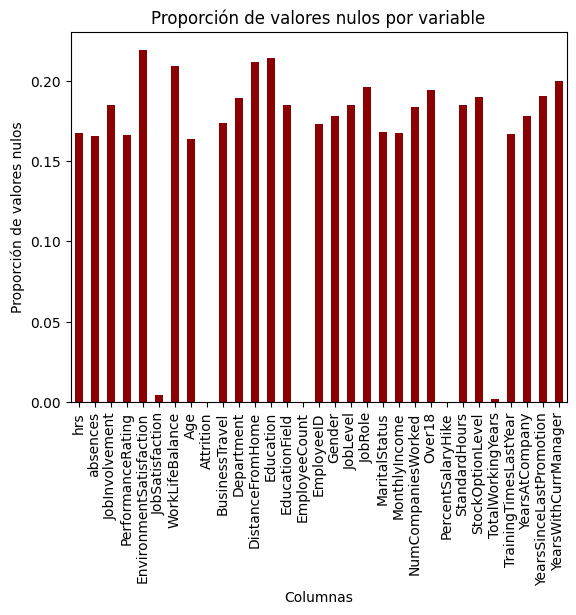

In [25]:
import matplotlib.pyplot as plt

# Convertir en un dataframe
df = pd.DataFrame(data)

# Calcular la proporción de valores nulos en cada columna
proporciones_nulos = df.isnull().mean()

# Crear un gráfico de barras de las proporciones de valores nulos
proporciones_nulos.plot(kind='bar', color='darkred')

# Agregar etiquetas y títulos
plt.xlabel('Columnas')
plt.ylabel('Proporción de valores nulos')
plt.title('Proporción de valores nulos por variable')

# Mostrar el gráfico
plt.show()

Ya habíamos mencionado previamente que las variables *Attrition*, *EmployeeCount* y *PercentSalaryHike* no tenían valores nulos y esto se puede comprobar observando el gráfico.

En cuanto al resto de variables, exceptuando las variables *JobSatisfaction* y *TotalWorkingYears*, todas tienen una proporción de valores nulos de entre el 15-22%. Teniendo esto en cuenta, deberemos tomar medidas para manejar estos datos faltantes (ya sea eliminándolos, imputando valores faltantes o utilizando técnicas de modelado que sean resistentes a valores faltantes) para asegurarnos de que no afecten significativamente a las predicciones de nuestro modelo.

Una vez realizado el análisis exploratorio de datos, podemos asegurar que estamos ante un problema de clasificación. Podemos llegar a esta conclusión debido a que la variable de respuesta es binaria, es decir, un empleado o se queda en la empresa o se va de esta. 

En cuanto a si el problema está desbalanceado o no, por definición los problemas de burnout son desbalanceados ya que debería haber un mayor número de empleados que se quedan en la empresa que aquellos que deciden marcharse. Para asegurarnos de esto, comprobaremos la proporción de aquellos empleados que deciden quedarse frente a aquellos que deciden marcharse.

In [32]:
df = pd.DataFrame(data)

# Calcular la proporción de sí y no en la columna de Attrition
df['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

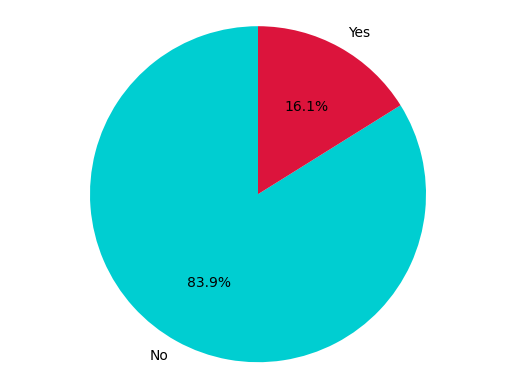

In [35]:
df = pd.DataFrame(data)

# Calcular la proporción de sí y no en la columna de Attrition
counts = df['Attrition'].value_counts()
sizes = [counts[0], counts[1]]

# Crear el pie chart
labels = ['No', 'Yes']
colors = ['darkturquoise', 'crimson']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Mostrar el pie chart
plt.axis('equal')
plt.show()

Como podemos observar, hay una gran mayoría de empleados que deciden no dejar la empresa, por lo tanto podemos asegurar que el problema está desbalanceado.

#TODO
- [ ] Evaluar y entenender como tenemos que tratar los valores nulos de cada variable